In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from PIL import Image

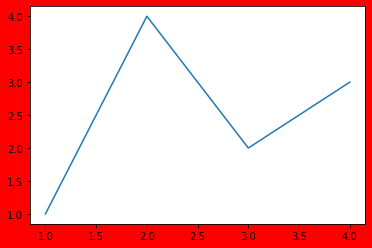

In [3]:

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.
fig.set_facecolor("red") # Changes the color of the figure
plt.show()

### 1. First Simple Table

In [4]:
fake_data = {
    "":["USA", "UK", "Australia", "Canada", "France", "Germany", "Spain", "Japan"],
    "1979":["1817","1815","1919","1,841","1,787","1,775","1,929","2,073"],
    "2017":["1,757","1,670","1,731","1,696","1,514","1,354","1,686","1,738"],
    "%":["-3.30","-7.98","-9.79","-7.87","-15.27","-23.27","-12.59","-16.16"]
}

df_working = pd.DataFrame(fake_data)

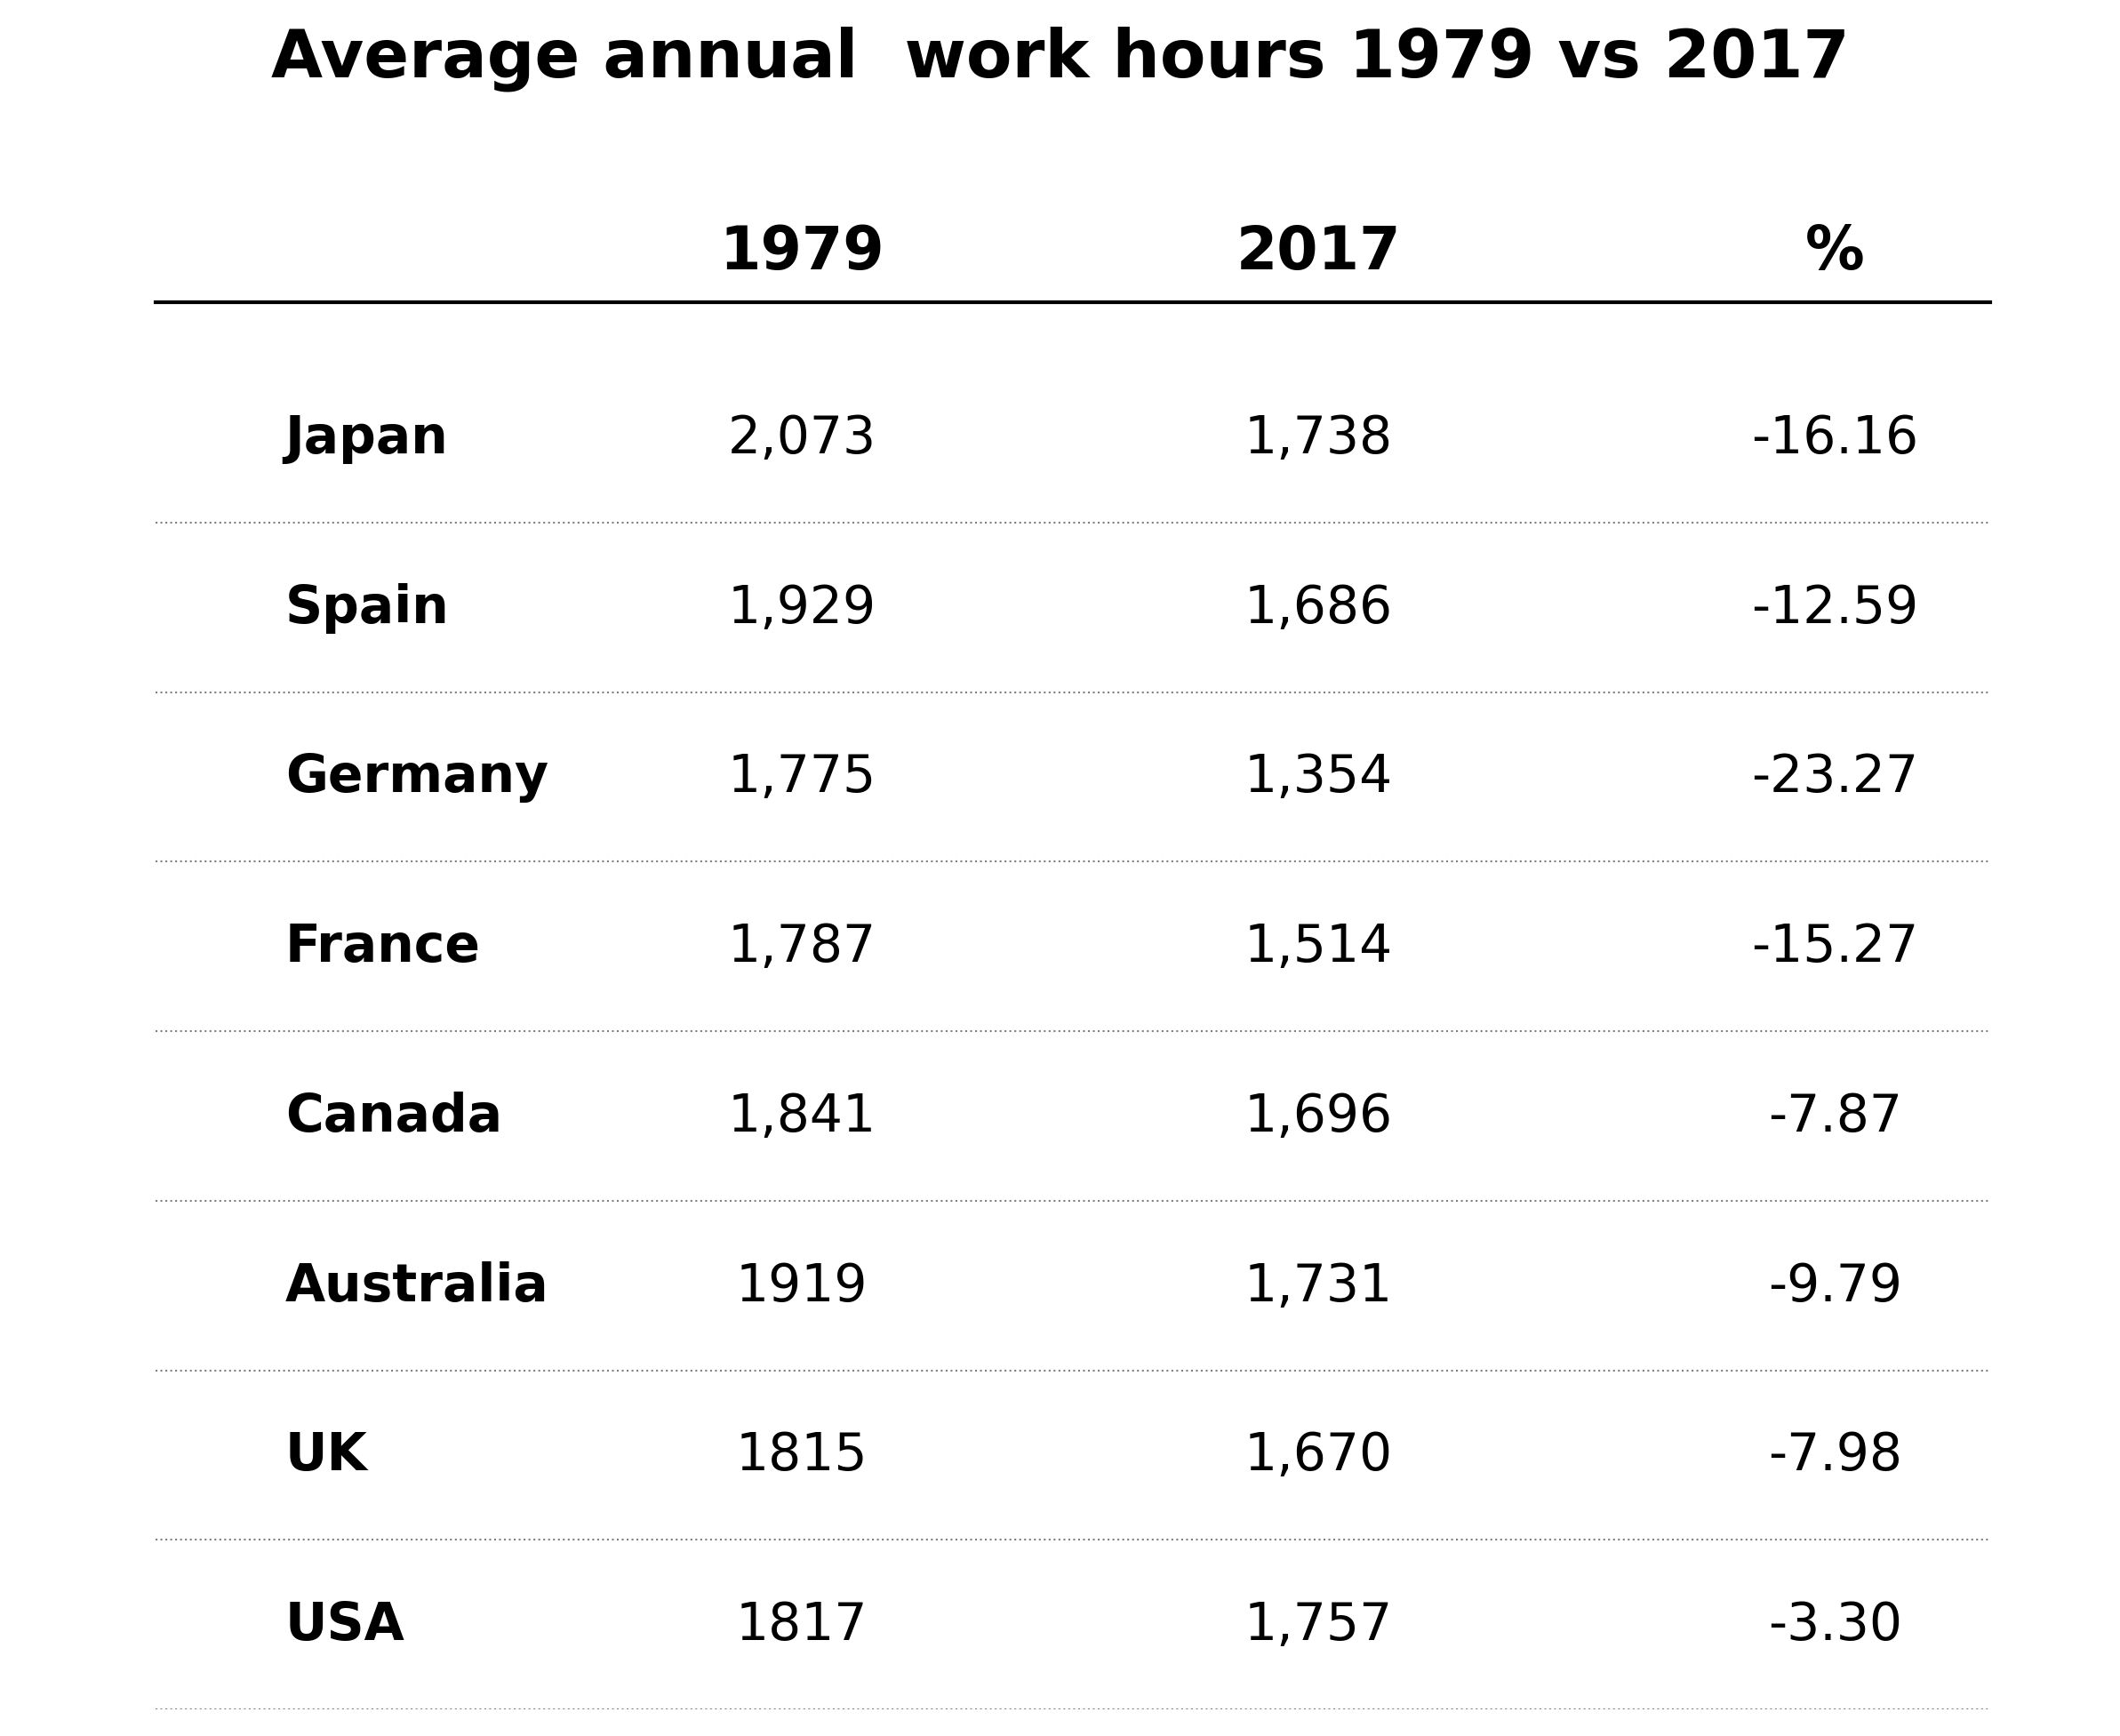

In [42]:
# making the structure
fig, ax = plt.subplots(figsize=(10,8), dpi=300)

rows = 9 #   number of rows that we want
cols = 4 #   number of columns that we want


ax.set_ylim(-.5, rows) #  y limits
ax.set_xlim(0, cols) #  X limits

# iterating over each row of the dataframe and plot the text
# df_working is a DataFrame object with our fake data
for row in df_working.iterrows(): # this will return the row as a tupple
        
        # row[0] will be the index of the row
        # row[1] will be the actual data as a Series

        # ploting the country
        ax.text(x=.5, y=row[0], s=row[1][""], va="center", ha="left", weight="bold", size=14)

        # 1979
        ax.text(x=1.5, y=row[0], s=row[1]["1979"], va="center", ha="center", size=14)

        # 2017
        ax.text(x=2.5, y=row[0], s=row[1]["2017"], va="center", ha="center", size=14)

        # %
        ax.text(x=3.5, y=row[0], s=row[1]["%"], va="center", ha="center", size=14)




ax.axis('off') # removing all the spines

# Adding the headers
ax.text(1.5, rows-1, '1979', weight='bold', ha='center', size=16)
ax.text(2.5, rows-1, '2017', weight='bold', ha='center', size=16)
ax.text(3.5, rows-1, '%', weight='bold', ha='center', size=16)

# Adding title
ax.set_title(
        'Average annual  work hours 1979 vs 2017',
        loc='center',
        fontsize=18,
        weight='bold'
    )

# adds main line belowthe headers
ax.plot([.25,cols-.2], [rows-1.2, rows-1.2],ls="-",lw=1,c="black")


# adds multiple lines below each row
for row in df_working.iterrows():
        ax.plot(
            [.25, cols-.2],
            [row[0] -.5, row[0] - .5],
            ls=':',
            lw='.5',
            c='grey'
        )



plt.show()

### 2. Prettier Table

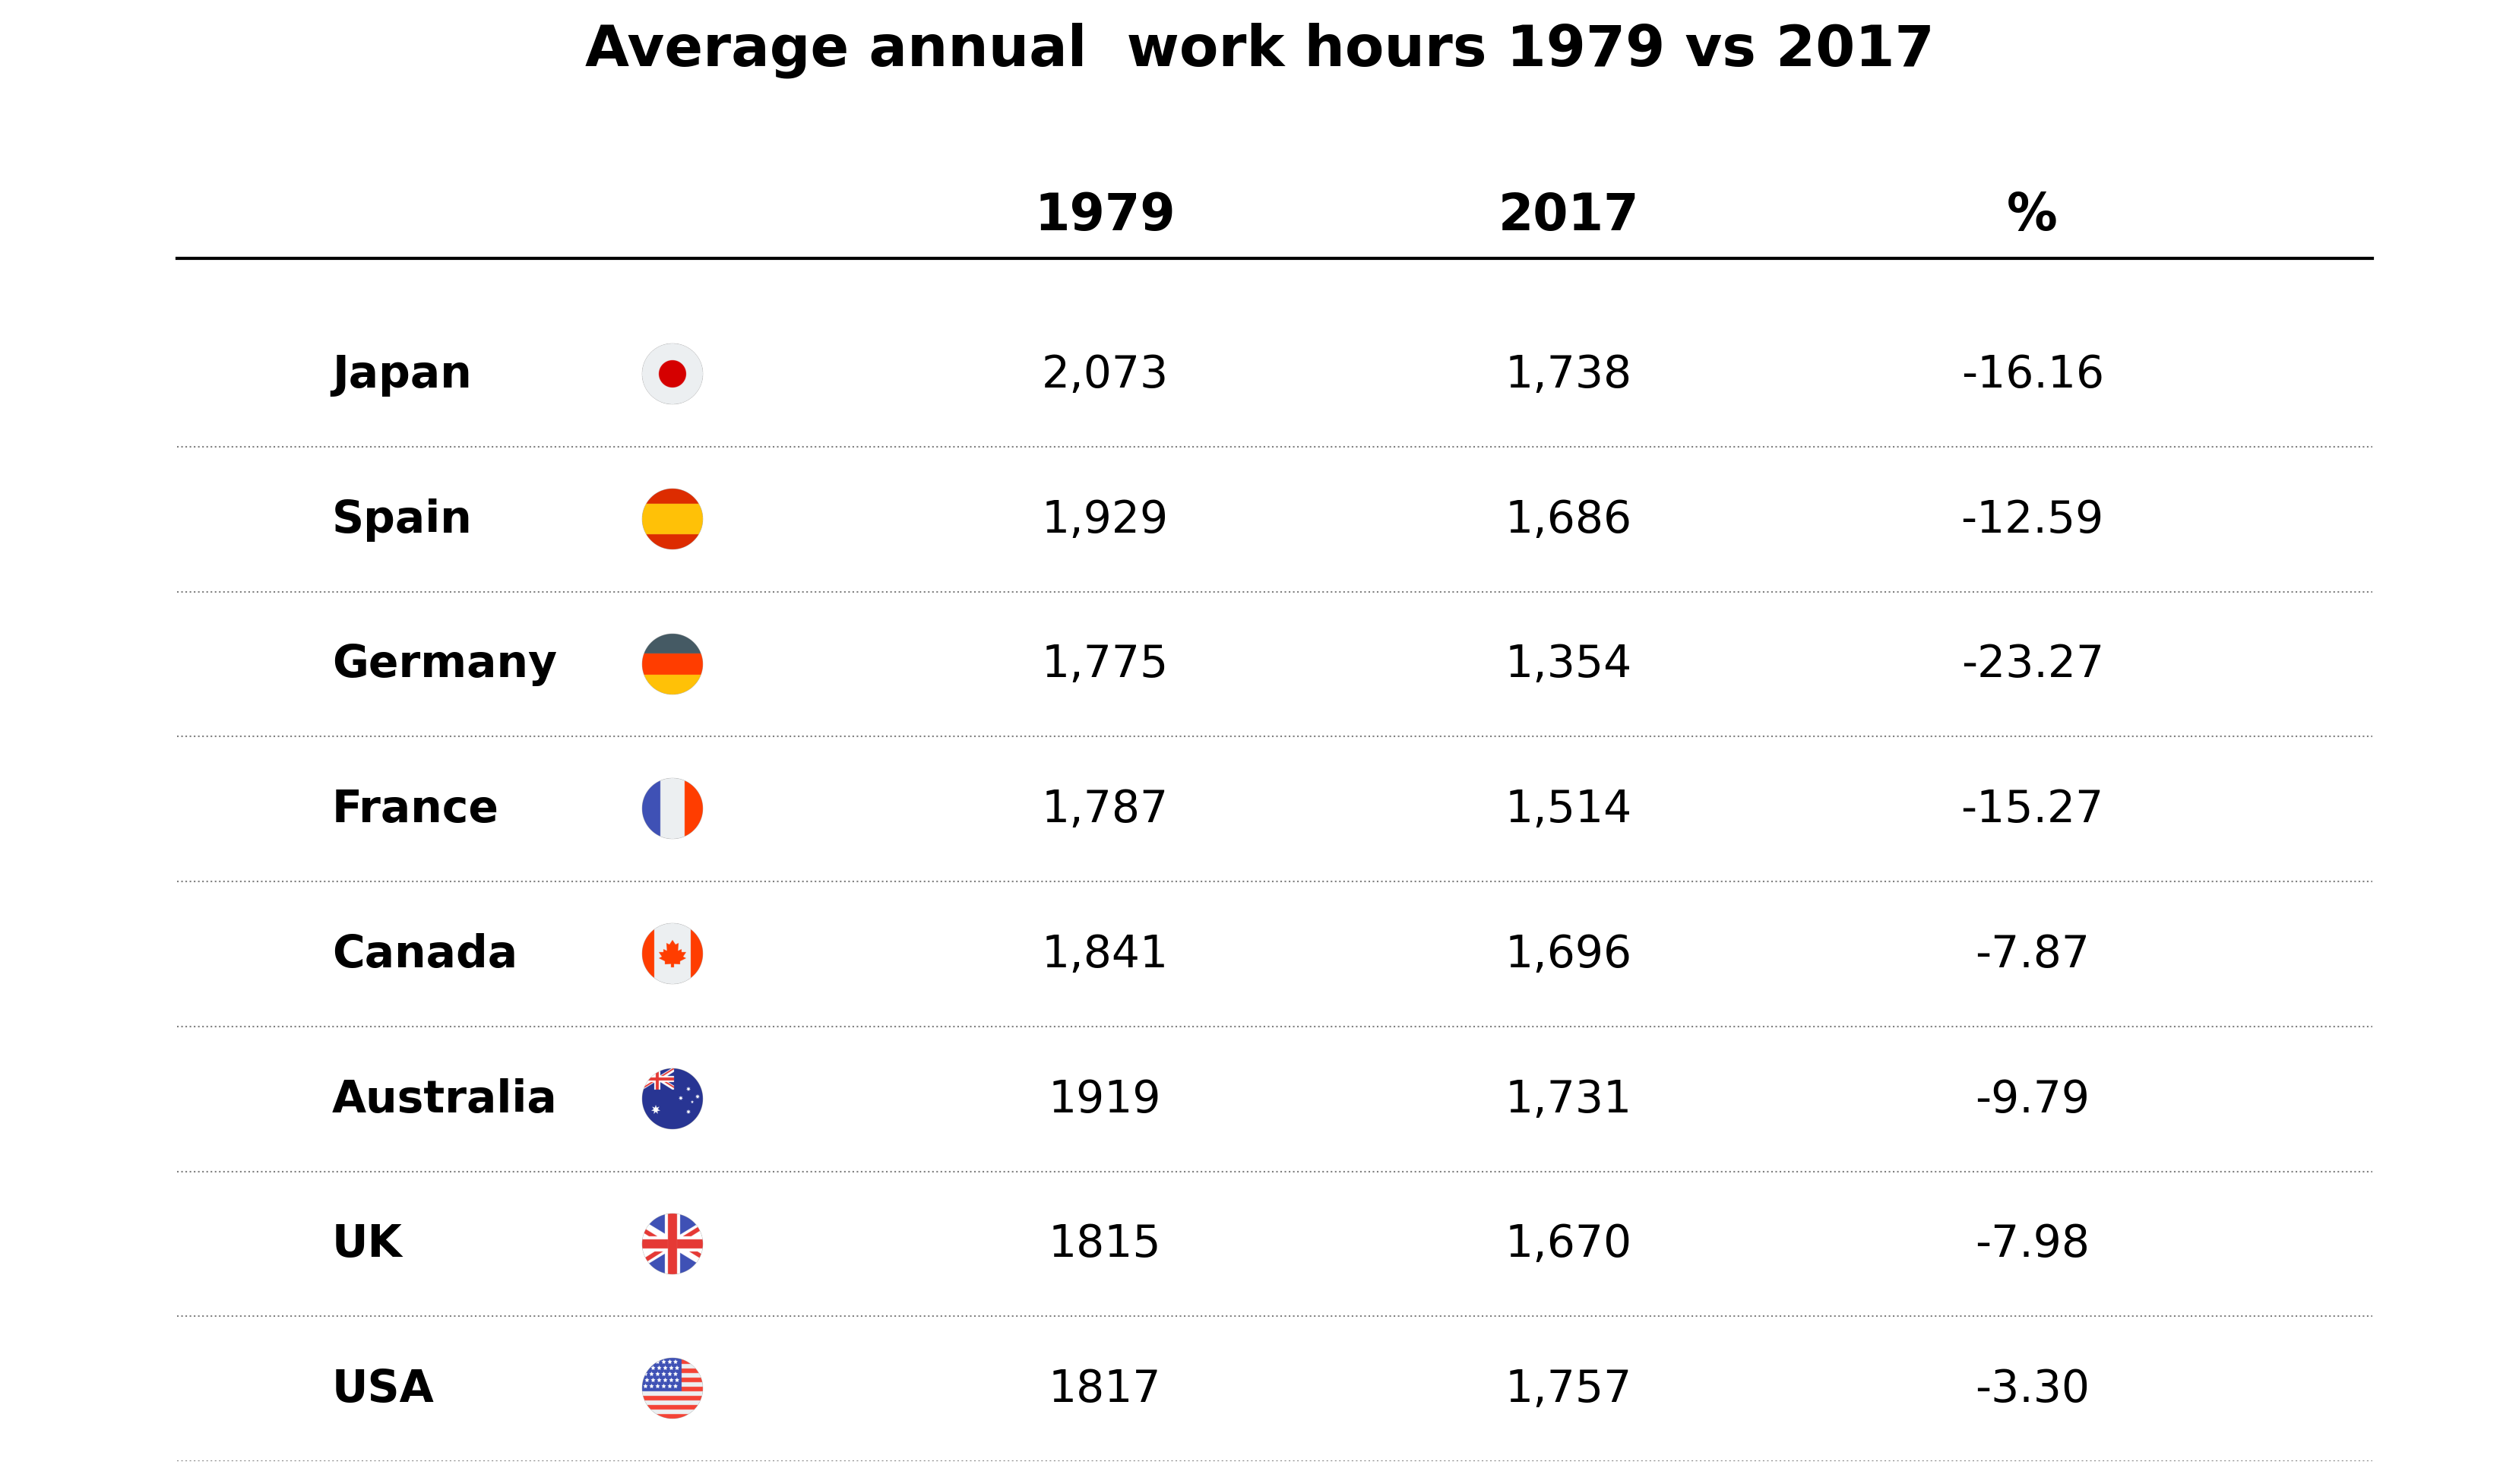

In [77]:
# making the structure
fig, ax = plt.subplots(figsize=(14,8), dpi=300)

rows = 9 #   number of rows that we want
cols = 4 #   number of columns that we want


ax.set_ylim(-.5, rows) #  y limits
ax.set_xlim(0, cols) #  X limits

# iterating over each row of the dataframe and plot the text
# df_working is a DataFrame object with our fake data
for row in df_working.iterrows(): # this will return the row as a tupple
        
        # row[0] will be the index of the row
        # row[1] will be the actual data as a Series

        # ploting the country
        ax.text(x=.5, y=row[0], s=row[1][""], va="center", ha="left", weight="bold", size=14)

        # 1979
        ax.text(x=1.75, y=row[0], s=row[1]["1979"], va="center", ha="center", size=14)

        # 2017
        ax.text(x=2.5, y=row[0], s=row[1]["2017"], va="center", ha="center", size=14)

        # %
        ax.text(x=3.25, y=row[0], s=row[1]["%"], va="center", ha="center", size=14)




ax.axis('off') # removing all the spines

# Adding the headers
ax.text(1.75, rows-1, '1979', weight='bold', ha='center', size=16)
ax.text(2.5, rows-1, '2017', weight='bold', ha='center', size=16)
ax.text(3.25, rows-1, '%', weight='bold', ha='center', size=16)

# Adding title
ax.set_title(
        'Average annual  work hours 1979 vs 2017',
        loc='center',
        fontsize=18,
        weight='bold'
    )

# adds main line belowthe headers
ax.plot([.25,cols-.2], [rows-1.2, rows-1.2],ls="-",lw=1,c="black")


# adds multiple lines below each row
for row in df_working.iterrows():
        ax.plot(
            [.25, cols-.2],
            [row[0] -.5, row[0] - .5],
            ls=':',
            lw='.5',
            c='grey'
        )




# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform


# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])


ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])

for x in range(0, rows-1):
    ax_coords = DC_to_NFC([.8, x-.25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_working[''].iloc[x], flag_ax)


plt.show()

In [60]:
def ax_logo(country, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    if country == "UK":
        country= "great-britain"

    logo_url = f'https://img.icons8.com/color/344/{country.lower()}-circular.png'
    logo = Image.open(urllib.request.urlopen(logo_url))
    ax.imshow(logo)
    ax.axis('off')
    return ax